# Basic TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline  
print ("PACKAGES LOADED")

PACKAGES LOADED


# Session

In [2]:
sess = tf.Session()
print ("OPEN SESSION")

OPEN SESSION


# TF constant

In [3]:
def print_tf(x):
    print("TYPE IS\n %s" % (type(x)))
    print("VALUE IS\n %s" % (x))
hello = tf.constant("HELLO. IT'S ME. ")
print_tf(hello)

TYPE IS
 <class 'tensorflow.python.framework.ops.Tensor'>
VALUE IS
 Tensor("Const:0", shape=(), dtype=string)


# TF session run

In [4]:
hello_out = sess.run(hello)
print_tf(hello_out)

TYPE IS
 <class 'bytes'>
VALUE IS
 b"HELLO. IT'S ME. "


# Other Types of Constant


In [5]:
a = tf.constant(1.5)
b = tf.constant(2.5)
print_tf(a)
print_tf(b)

TYPE IS
 <class 'tensorflow.python.framework.ops.Tensor'>
VALUE IS
 Tensor("Const_1:0", shape=(), dtype=float32)
TYPE IS
 <class 'tensorflow.python.framework.ops.Tensor'>
VALUE IS
 Tensor("Const_2:0", shape=(), dtype=float32)


In [6]:
a_out = sess.run(a)
b_out = sess.run(b)
print_tf(a_out)
print_tf(b_out)

TYPE IS
 <class 'numpy.float32'>
VALUE IS
 1.5
TYPE IS
 <class 'numpy.float32'>
VALUE IS
 2.5


# Variables

In [7]:
weight = tf.Variable(tf.random_normal([5, 2], stddev=0.1))
print_tf(weight)

TYPE IS
 <class 'tensorflow.python.ops.variables.Variable'>
VALUE IS
 <tf.Variable 'Variable:0' shape=(5, 2) dtype=float32_ref>


In [8]:
init = tf.global_variables_initializer()
sess.run(init)
print ("INITIALIZING ALL VARIALBES")

INITIALIZING ALL VARIALBES


In [9]:
weight_out = sess.run(weight)
print_tf(weight_out)

TYPE IS
 <class 'numpy.ndarray'>
VALUE IS
 [[-0.07624979  0.08959393]
 [ 0.01450755 -0.15677218]
 [ 0.03121379  0.01128111]
 [-0.03098905  0.07732225]
 [ 0.06190876  0.04524359]]


# PlaceHolders

In [10]:
x = tf.placeholder(tf.float32, [None, 5])
print_tf(x)

TYPE IS
 <class 'tensorflow.python.framework.ops.Tensor'>
VALUE IS
 Tensor("Placeholder:0", shape=(?, 5), dtype=float32)


# Operation with Variables and PlaceHolders

In [11]:
oper = tf.matmul(x, weight)
print_tf(oper)

TYPE IS
 <class 'tensorflow.python.framework.ops.Tensor'>
VALUE IS
 Tensor("MatMul:0", shape=(?, 2), dtype=float32)


In [12]:
data  =  np.random.rand(1, 5)
oper_out = sess.run(oper, feed_dict={x: data})
print_tf(oper_out)

TYPE IS
 <class 'numpy.ndarray'>
VALUE IS
 [[-0.00956647  0.02813285]]


In [13]:
data = np.random.rand(2, 5)
oper_out = sess.run(oper, feed_dict={x: data})
print_tf(oper_out)

TYPE IS
 <class 'numpy.ndarray'>
VALUE IS
 [[-0.01462471  0.09983155]
 [ 0.02133104 -0.02220716]]


# Simple Regression

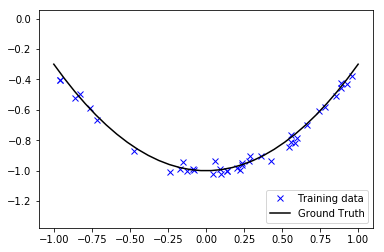

In [14]:
np.random.seed(0)
def f(x, W, b):
    vals = W*x**2 + b
    return vals

# Reference parameter : y = W*x^2 + b
Wref = 0.7
bref = -1.

n    = 40
noise_var = 0.001

# Generate Training Data Set
train_X   = 2*np.random.random((n,1)) - 1
train_Y   = f(train_X, Wref, bref) + np.sqrt(noise_var)*np.random.randn(n,1) # Add noise

# Function
x_list = np.linspace(-1,1,num=30)[:,np.newaxis]
y_list = f(x_list, Wref, bref)

n_samples = train_X.size 

# Plot
plt.figure(1)
plt.plot(train_X[:], train_Y[:], 'bx', label='Training data')
plt.plot(x_list, y_list, 'k-', label='Ground Truth')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

### Define MLP

In [15]:
input_dim = train_X.shape[1]
output_dim = train_Y.shape[1]

hid_size = 16

with tf.variable_scope('mlp'):
    x_ph = tf.placeholder(tf.float32, (None, 1), 'x')
    y_ph = tf.placeholder(tf.float32, (None, 1), 'y')
    learning_rate_ph = tf.placeholder(tf.float32, (), 'lr')        

    out = tf.layers.dense(x_ph, hid_size, tf.tanh, # Tangent Hyperbolic Activation
                          kernel_initializer=tf.random_normal_initializer(stddev=0.01,seed=0),
                          name='hidden')
    y_predict = tf.layers.dense(out, output_dim, # Linear Layer
                          kernel_initializer=tf.random_normal_initializer(stddev=0.01,seed=0), 
                          name='y_predict')

weights = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="mlp")

print ("Multi Layer Perceptron")
print ("Input dim:[%d],Output dim:[%d]"%(input_dim,output_dim))
print ("Trainable Variables (%02d)" % len(weights))
for i in range(len(weights)):
    w_name  = weights[i].name
    w_shape = weights[i].get_shape().as_list()
    print (" [%02d] Name:[%s] Shape:[%s]" % (i,w_name,w_shape))
print ("")


Multi Layer Perceptron
Input dim:[1],Output dim:[1]
Trainable Variables (04)
 [00] Name:[mlp/hidden/kernel:0] Shape:[[1, 16]]
 [01] Name:[mlp/hidden/bias:0] Shape:[[16]]
 [02] Name:[mlp/y_predict/kernel:0] Shape:[[16, 1]]
 [03] Name:[mlp/y_predict/bias:0] Shape:[[1]]



### Define Loss and Optimizer

In [16]:
loss = 0.5*tf.reduce_mean(tf.square(y_ph - y_predict)) # Squared Error
optim = tf.train.AdamOptimizer(learning_rate=learning_rate_ph).minimize(loss) # AdamOptimizer (Gradient Descent Algorithm)

### Initialize TF graph

In [17]:
# Do some optimizations
init = tf.global_variables_initializer()
sess.run(init)

# Summary writer
tf.summary.scalar('loss', loss)
merged = tf.summary.merge_all()
summary_writer = tf.summary.FileWriter('./tf_logs/mlp', graph=sess.graph)
print ("Summary ready")

Summary ready


### Training MLP

In [18]:
print ("Training Start!")
lr = 1e-2

training_epochs = 300
display_step = 30

batch_size = 4
total_batch = int(n/batch_size)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.    
    random_idices = np.random.permutation(n)
    # Loop over all batches
    for i in range(total_batch):
        start = i*batch_size
        end = np.minimum((i+1)*batch_size,n)
        
        batch_idx = random_idices[start:end]        
        batch_X = train_X[batch_idx,:] 
        batch_Y = train_Y[batch_idx,:]
        
        # Fit training using batch data
        summary, _ = sess.run([merged, optim]
                , feed_dict={x_ph: batch_X, y_ph: batch_Y, learning_rate_ph: lr})
        
        # Compute average loss
        batch_loss = sess.run(loss
                        , feed_dict={x_ph: batch_X, y_ph: batch_Y})
        avg_cost += batch_loss/total_batch
        
        # Add summary
        summary_writer.add_summary(summary, epoch*total_batch+i)
    
    # Display logs per epoch step
    if epoch % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.3f" % (epoch, training_epochs, avg_cost))
print ("Optimization Finished!")

Training Start!
Epoch: 000/300 cost: 0.280
Epoch: 030/300 cost: 0.024
Epoch: 060/300 cost: 0.024
Epoch: 090/300 cost: 0.021
Epoch: 120/300 cost: 0.001
Epoch: 150/300 cost: 0.001
Epoch: 180/300 cost: 0.001
Epoch: 210/300 cost: 0.001
Epoch: 240/300 cost: 0.001
Epoch: 270/300 cost: 0.001
Optimization Finished!


### Prediction with Trained MLP

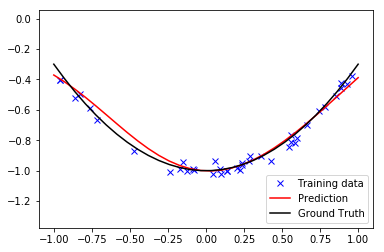

In [19]:
# Function
y_predict_list = sess.run(y_predict, feed_dict={x_ph: x_list})

# Plot
plt.figure(1)
plt.plot(train_X[:], train_Y[:], 'bx', label='Training data')
plt.plot(x_list, y_predict_list, 'r-', label='Prediction')
plt.plot(x_list, y_list, 'k-', label='Ground Truth')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

# Check Summary

### Run the command line
#### tensorboard --logdir=./tf_logs/mlp
### Open http://localhost:6006/ into your web browser

![](./figs/summary.png)

### In Graphs tab

![](./figs/graph_structure1.png)
![](./figs/graph_structure2.png)

# Simple Convolutional Neural Network

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Packages loaded.
How does the training data look like?
22565th Training Data Label is 9
27873th Training Data Label is 7
8810th Training Data Label is 7


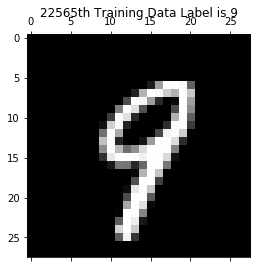

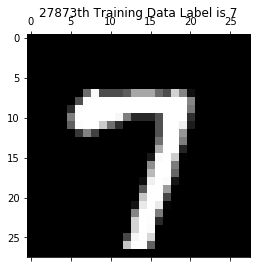

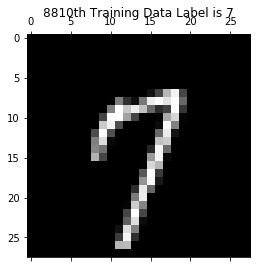

In [29]:
tf.reset_default_graph()
sess = tf.Session()

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print ("Packages loaded.")

# How does the training data look like?
print ("How does the training data look like?")
nsample = 3
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))
    
nsample = 10
rand_train_idx = np.random.randint(trainimg.shape[0], size=nsample)
rand_test_idx = np.random.randint(testimg.shape[0], size=nsample)

trainimg   = mnist.train.images[rand_train_idx,:]
trainlabel = mnist.train.labels[rand_train_idx,:]
testimg    = mnist.test.images[rand_test_idx,:]
testlabel  = mnist.test.labels[rand_test_idx,:]

### Define CNN

In [30]:
input_dim = [28, 28, 1]
n_output = 10

hid_size = 16
with tf.variable_scope('cnn'):
    x_ph = tf.placeholder(tf.float32, [None, np.product(input_dim)], name="x")    
    y_ph = tf.placeholder(tf.float32, [None, n_output], name="y")
    learning_rate_ph = tf.placeholder(tf.float32, (), 'lr')        
    
    x_reshaped = tf.reshape(x_ph, [-1,]+input_dim)
    out = tf.layers.conv2d (x_reshaped,
                            filters=16,
                            kernel_size=[5, 5],
                            strides=[2, 2],
                            activation=tf.tanh,
                            kernel_initializer=tf.random_normal_initializer(stddev=0.01,seed=0),
                            name="conv1") 
    out = tf.layers.conv2d (out,
                            filters=32,
                            kernel_size=[5, 5],
                            strides=[3, 3],
                            activation=tf.tanh,
                            kernel_initializer=tf.random_normal_initializer(stddev=0.01,seed=0),
                            name="conv2")    
    out = tf.contrib.layers.flatten(out)
    logits = tf.layers.dense(out, n_output, # Linear Layer
                          kernel_initializer=tf.random_normal_initializer(stddev=0.01,seed=0), 
                          name="dense")
    pred = tf.nn.softmax(logits,name="clase_probs")

weights = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="cnn")

print ("Convolutional Neural Network")
print ("Input dim:[%d,%d,%d],The number of class:[%d]"%(input_dim[0],input_dim[1],input_dim[2],n_output))
print ("Trainable Variables (%02d)" % len(weights))
for i in range(len(weights)):
    w_name  = weights[i].name
    w_shape = weights[i].get_shape().as_list()
    print (" [%02d] Name:[%s] Shape:[%s]" % (i,w_name,w_shape))
print ("")

Convolutional Neural Network
Input dim:[28,28,1],The number of class:[10]
Trainable Variables (06)
 [00] Name:[cnn/conv1/kernel:0] Shape:[[5, 5, 1, 16]]
 [01] Name:[cnn/conv1/bias:0] Shape:[[16]]
 [02] Name:[cnn/conv2/kernel:0] Shape:[[5, 5, 16, 32]]
 [03] Name:[cnn/conv2/bias:0] Shape:[[32]]
 [04] Name:[cnn/dense/kernel:0] Shape:[[288, 10]]
 [05] Name:[cnn/dense/bias:0] Shape:[[10]]



### Define Loss and Optimizer

In [31]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_ph,logits=logits)) # Squared Error
optim = tf.train.AdamOptimizer(learning_rate=learning_rate_ph).minimize(loss) # AdamOptimizer (Gradient Descent Algorithm)
corr = tf.equal(tf.argmax(pred,1), tf.argmax(y_ph,1)) # Count corrects
accr = tf.reduce_mean(tf.cast(corr, tf.float32)) # Accuracy

### Initialize TF graph

In [32]:
# Do some optimizations
init = tf.global_variables_initializer()
sess.run(init)

# Summary writer
tf.summary.scalar('loss', loss)
tf.summary.scalar('accr', accr)
merged = tf.summary.merge_all()
summary_writer = tf.summary.FileWriter('./tf_logs/cnn', graph=sess.graph)
print ("Summary ready")

Summary ready


### Training MLP

In [33]:
print ("Training Start!")
lr = 1e-2

training_epochs = 300
display_step = 30

batch_size = 4
total_batch = int(n/batch_size)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        summary, _ = sess.run([merged, optim]
                , feed_dict={x_ph: batch_xs, y_ph: batch_ys, learning_rate_ph: lr})
        # Compute average loss
        avg_cost += sess.run(loss
                , feed_dict={x_ph: batch_xs, y_ph: batch_ys})/total_batch
        # Add summary
        summary_writer.add_summary(summary, epoch*total_batch+i)
    # Display logs per epoch step
    if epoch % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
        train_acc = sess.run(accr, feed_dict={x: batch_xs, y: batch_ys, keepratio:1.})
        print (" Training accuracy: %.3f" % (train_acc))
        test_acc = sess.run(accr, feed_dict={x: testimg, y: testlabel, keepratio:1.})
        print (" Test accuracy: %.3f" % (test_acc))
        
print ("Optimization Finished!")

Training Start!


KeyboardInterrupt: 